In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def show_image(img, title):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

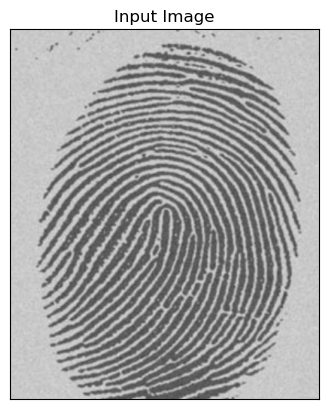

In [3]:
im = cv2.imread('fingerprint.png', 0)

show_image(im, 'Input Image')

In [4]:
def calc_mean(arr, weights):
    s = np.sum(np.multiply(arr, weights))
    mean = s / np.sum(arr)
    return mean

In [5]:
def global_thresh(img, del_T=10):
    T = 127
    hist = np.histogram(np.array(img), bins=255, range=[0, 255])[0]
    diff = None
    
    while diff is None or diff < del_T:
        m1 = calc_mean(hist[0:T+1], np.array(range(0, T+1)))
        m2 = calc_mean(hist[T+1:], np.array(range(T+1, 255)))
        new_T = int((m1 + m2) / 2)
        diff = abs(T - new_T)
        T = new_T
    
    return T

In [6]:
def apply_binary(img, T):
    img = np.array(img)
    out_img = np.zeros_like(img)
    r, c = img.shape
    
    for i in range(r):
        for j in range(c):
            if img[i, j] > T:
                out_img[i, j] = 255
    
    return out_img

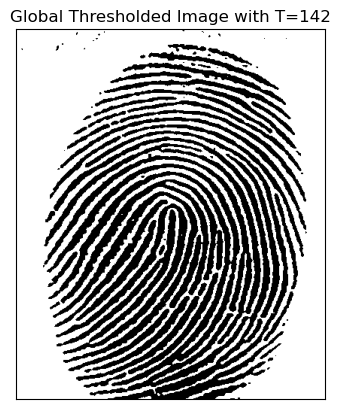

In [7]:
T = global_thresh(im, 5)
out_img = apply_binary(im, T)
show_image(out_img, f'Global Thresholded Image with T={T}')